# NGC 7331

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats

%matplotlib inline

## B filter

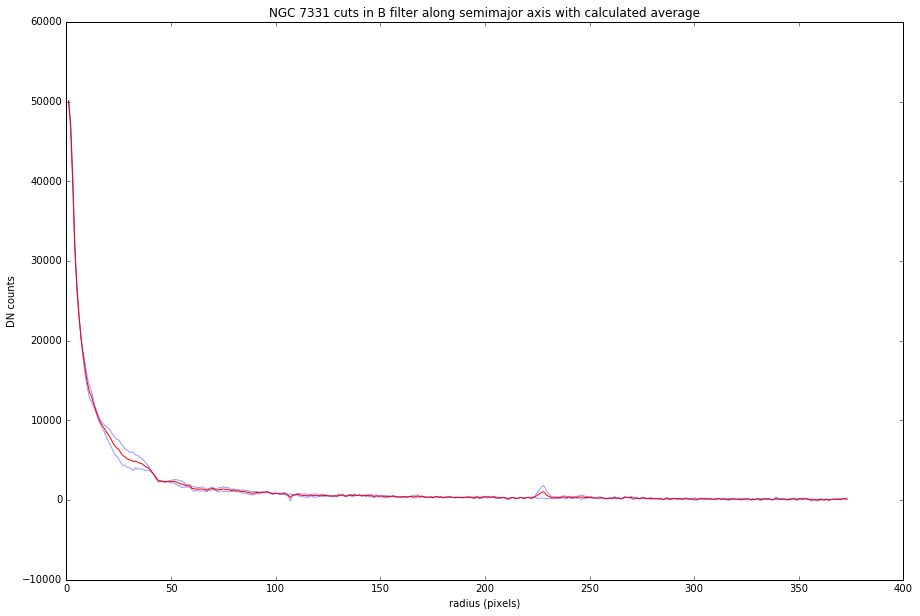

In [13]:
#mean sky level, standard deviation, etc from AIJ
mean_sky = 11381.349
sky_std = 73.140
area = 8704
#relatively small size of standard deviation in mean sky value means it's negligible compared to standard deviation of the galaxy
sky_std_mean = sky_std / np.sqrt(area)

#loading NGC7331 B data (just semimajor axis cuts) and subtracting mean sky value to get just galaxy counts
data_b = np.loadtxt('ngc7331B.txt')
pix = data_b[:,0]
cut_1 = data_b[:,1] - mean_sky
cut_2 = data_b[:,2] - mean_sky
#mean and standard deviation of cuts calculated in Excel
mean = data_b[:,3] - mean_sky
std = data_b[:,4]

fig = plt.figure(figsize=(15,10))
plt.plot(pix, cut_1, "b-", alpha=0.4)
plt.plot(pix, cut_2, "b-", alpha=0.4)
plt.plot(pix, mean, "r-")
plt.xlabel('radius (pixels)')
plt.ylabel('DN counts')
plt.title('NGC 7331 cuts in B filter along semimajor axis with calculated average')

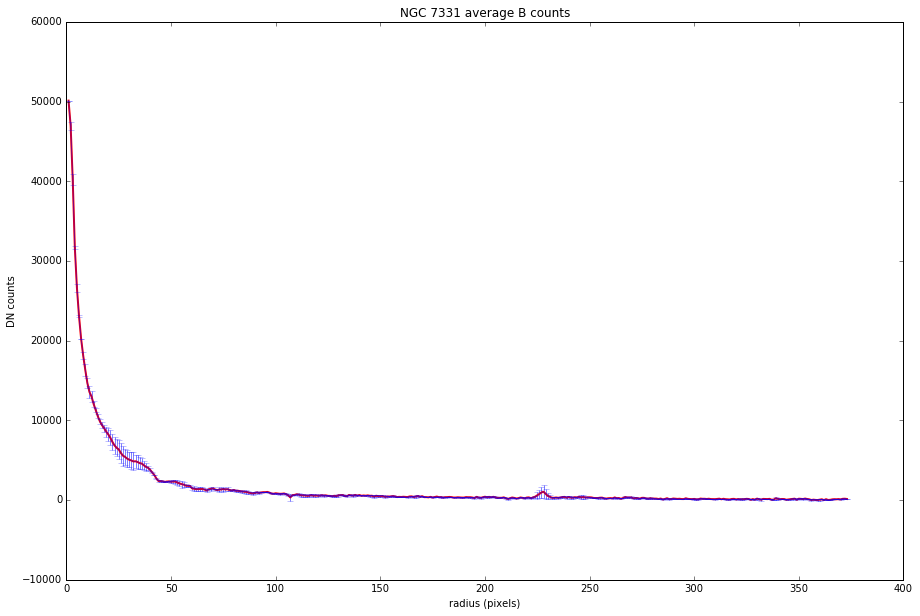

In [14]:
#calculating standard deviation of the mean
std_mean = std / np.sqrt(2)

fig = plt.figure(figsize=(15,10))
plt.plot(pix, mean, "r-", linewidth=2.0)
plt.errorbar(pix, mean, yerr = std_mean, alpha=0.5)
plt.xlabel('radius (pixels)')
plt.ylabel('DN counts')
plt.title('NGC 7331 average B counts')

linear best-fit parameters: [ 20.99696599   0.14848154]
uncertainties in best-fit parameters: [ 0.13979133  0.00802631]


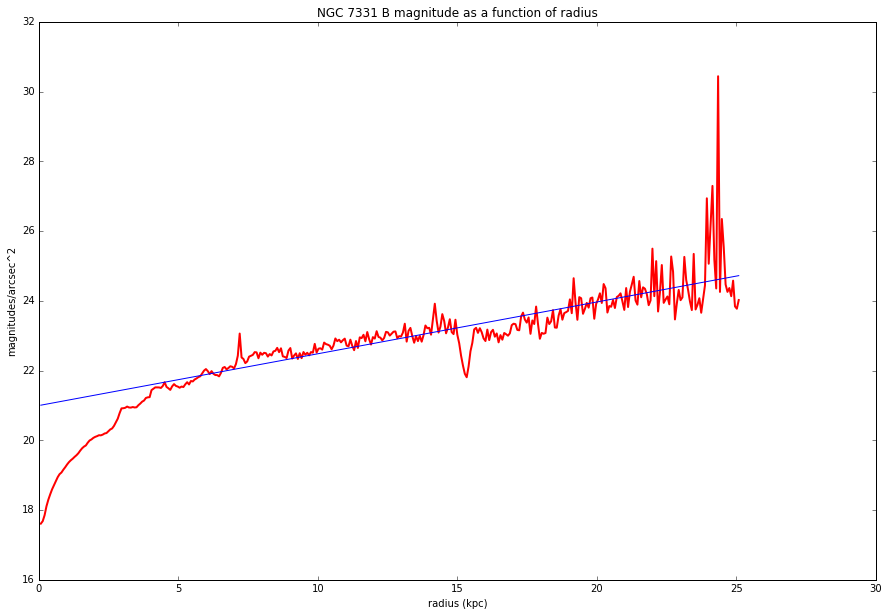

In [15]:
#ref star TYC 2743-2060-1 located at FITS(764,673) in combined B image of NGC 7331
ref_bmag = 12.57
#using source radius of 12pix, inner sky annulus radius 20pix, outer sky annulus radius 30pix
ref_DN = 5.2e6
zeropoint = ref_bmag + 2.5 * np.log10(ref_DN)

#converting DN counts to magnitudes using zeropoint calculated above
mean_mags = zeropoint - 2.5 * np.log10(mean)

#using NGC7331's distance away from us to calculate size of radii
dist = 13.87e3 #kpc
angles = (pix / 3600) * (np.pi / 180) #converting from arcsec to degrees to radians
r_kpc = dist * np.tan(angles)

#defining linear model to calculate surface brightness profile best fit
#(magnitudes are a log of the counts - the function for surface brightness becomes linear instead of exponential)
def linear_model(constant, A, R):
    return A + R*constant

#plugging in the disk section of NGC 7331 cuts to find best fit parameters
popt, pcov = scipy.optimize.curve_fit(linear_model, r_kpc[125:372], mean_mags[125:372])
print'linear best-fit parameters:', popt
popt_uncertainties = np.sqrt(np.diag(pcov))
print'uncertainties in best-fit parameters:', popt_uncertainties

#calculating best fit line using measured radii and parameters above
best_fit_lin = linear_model(r_kpc, popt[0], popt[1])

fig = plt.figure(figsize=(15,10))
plt.plot(r_kpc, mean_mags, "r-", linewidth=2.0)
plt.plot(r_kpc, best_fit_lin)
plt.xlabel('radius (kpc)')
plt.ylabel('magnitudes/arcsec^2')
plt.title('NGC 7331 B magnitude as a function of radius')

As expected, it looks like the changes in the magnitude of NGC 7331 are linearly related to changes in radius (magnitude increasing as radius increases, which means a decrease in brightness!). The "bulge" section of the data does not match this fit, also as expected.

## V filter

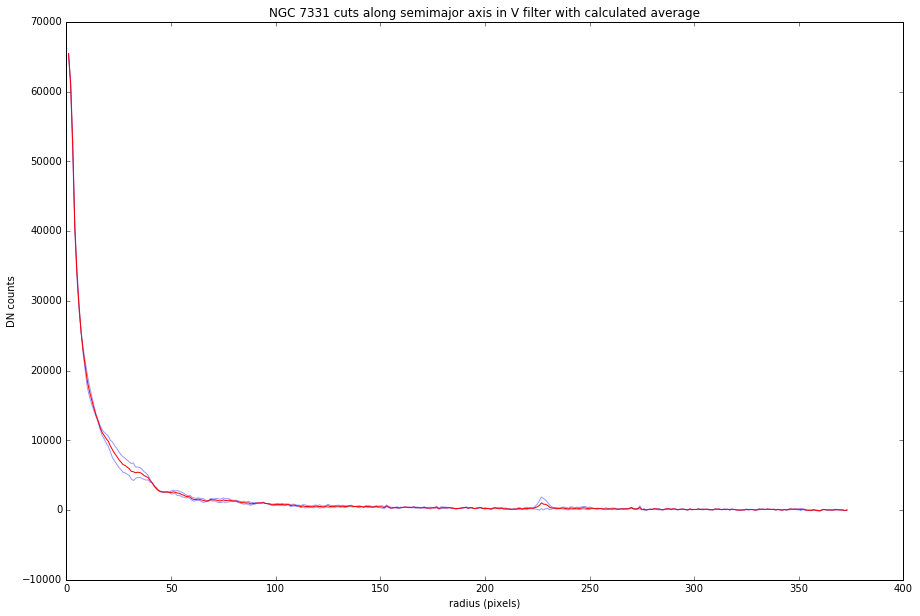

In [16]:
#same procedure followed as for B filter data above
mean_sky = 13510.811
std_sky = 80.859
area = 17272
sky_std_mean = std_sky / np.sqrt(area)

data_v = np.loadtxt('ngc7331V.txt')
pix = data_v[:,0]
cut_1 = data_v[:,1] - mean_sky
cut_2 = data_v[:,2] - mean_sky
mean = data_v[:,3] - mean_sky
std = data_v[:,4]

fig = plt.figure(figsize=(15,10))
plt.plot(pix, cut_1, "b-", alpha=0.4)
plt.plot(pix, cut_2, "b-", alpha=0.4)
plt.plot(pix, mean, "r-")
plt.xlabel('radius (pixels)')
plt.ylabel('DN counts')
plt.title('NGC 7331 cuts along semimajor axis in V filter with calculated average')

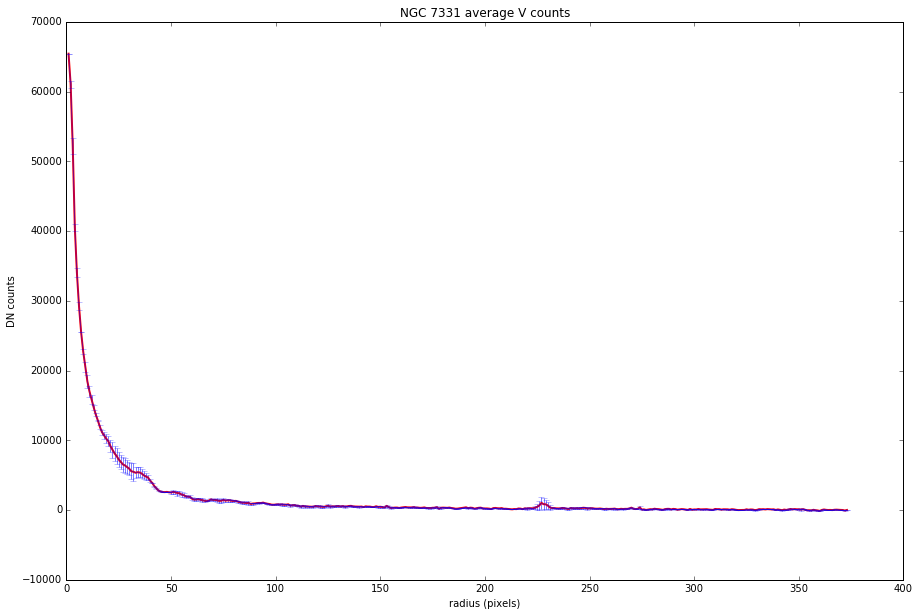

In [17]:
std_mean = std / np.sqrt(2)

fig = plt.figure(figsize=(15,10))
plt.plot(pix, mean, "r-", linewidth=2.0)
plt.errorbar(pix, mean, yerr = std_mean, alpha=0.5)
plt.xlabel('radius (pixels)')
plt.ylabel('DN counts')
plt.title('NGC 7331 average V counts')

## R filter

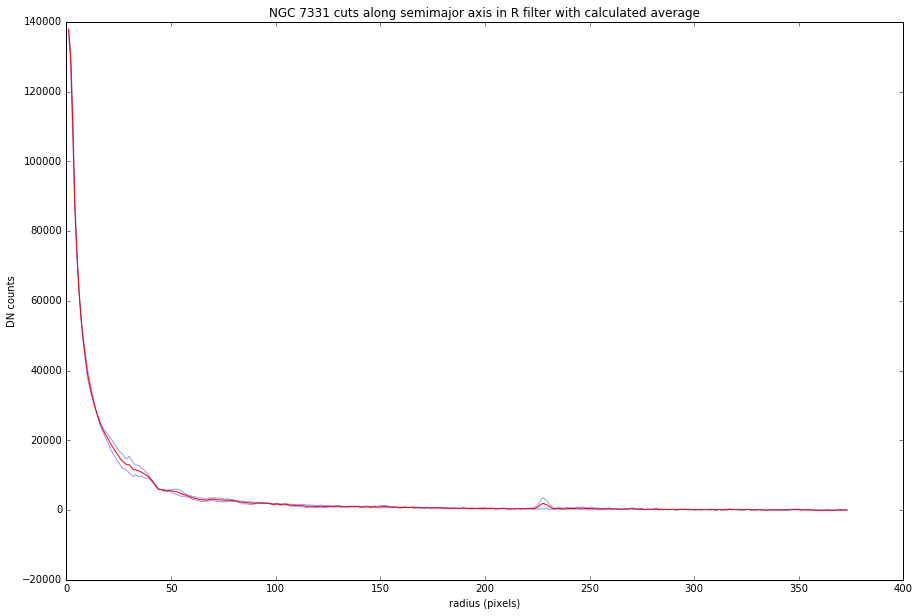

In [18]:
#same procedure followed as for B and V filter data above
mean_sky = 16040.455
sky_std = 91.607
area = 15180
sky_std_mean = sky_std / np.sqrt(area)

data_r = np.loadtxt('ngc7331R.txt')
pix = data_r[:,0]
cut_1 = data_r[:,1] - mean_sky
cut_2 = data_r[:,2] - mean_sky
mean = data_r[:,3] - mean_sky
std = data_r[:,4]

fig = plt.figure(figsize=(15,10))
plt.plot(pix, cut_1, "b-", alpha=0.4)
plt.plot(pix, cut_2, "b-", alpha=0.4)
plt.plot(pix, mean, "r-")
plt.xlabel('radius (pixels)')
plt.ylabel('DN counts')
plt.title('NGC 7331 cuts along semimajor axis in R filter with calculated average')

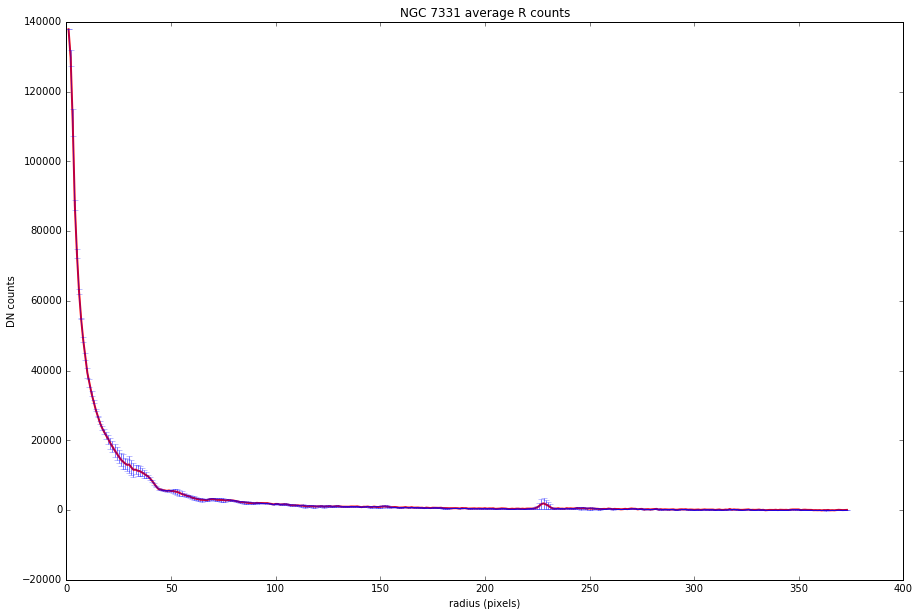

In [19]:
std_mean = std / np.sqrt(2)

fig = plt.figure(figsize=(15,10))
plt.plot(pix, mean, "r-", linewidth=2.0)
plt.errorbar(pix, mean, yerr = std_mean, alpha=0.5)
plt.xlabel('radius (pixels)')
plt.ylabel('DN counts')
plt.title('NGC 7331 average R counts')